In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.ar_model import AutoReg

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/ghana_gdp.csv',
                 index_col='year', parse_dates=['year'])

display(df.head())
display(df.info())


,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62 entries, 1960-01-01 to 2021-01-01
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GDP (current US$)  62 non-null     float64
dtypes: float64(1)
memory usage: 992.0 bytes


None

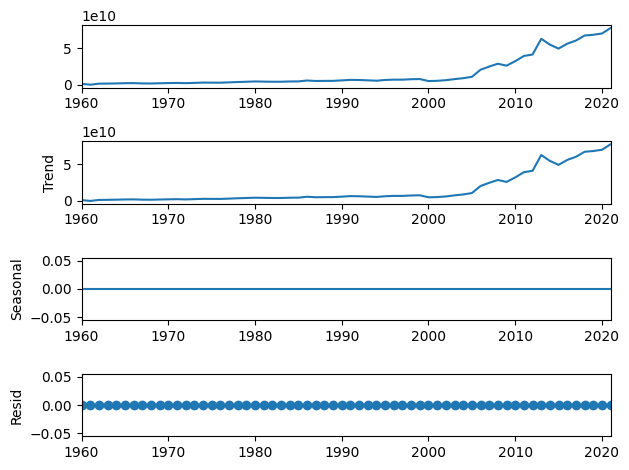

In [3]:
decompose = seasonal_decompose(df)
decompose.plot()
plt.show()

In [4]:
train_df = df.iloc[:-1]
test_df = df.iloc[-1]


In [5]:
def stationary(data, p_value=0.05):
    stats = adfuller(data)
    if stats[1] > p_value:
        print('Series is stationary')
    else:
        print('Series is not stationary')


stationary(df)


Series is stationary


In [6]:
# Exponential smoothing
ses = SimpleExpSmoothing(train_df)
alpha = 0.7
model = ses.fit(smoothing_level=alpha, optimized=False)
exp_pred = model.forecast(1)
print(exp_model := mean_squared_error(test_df, exp_pred))

7.037420453184888e+19


NameError: name 'acf' is not defined

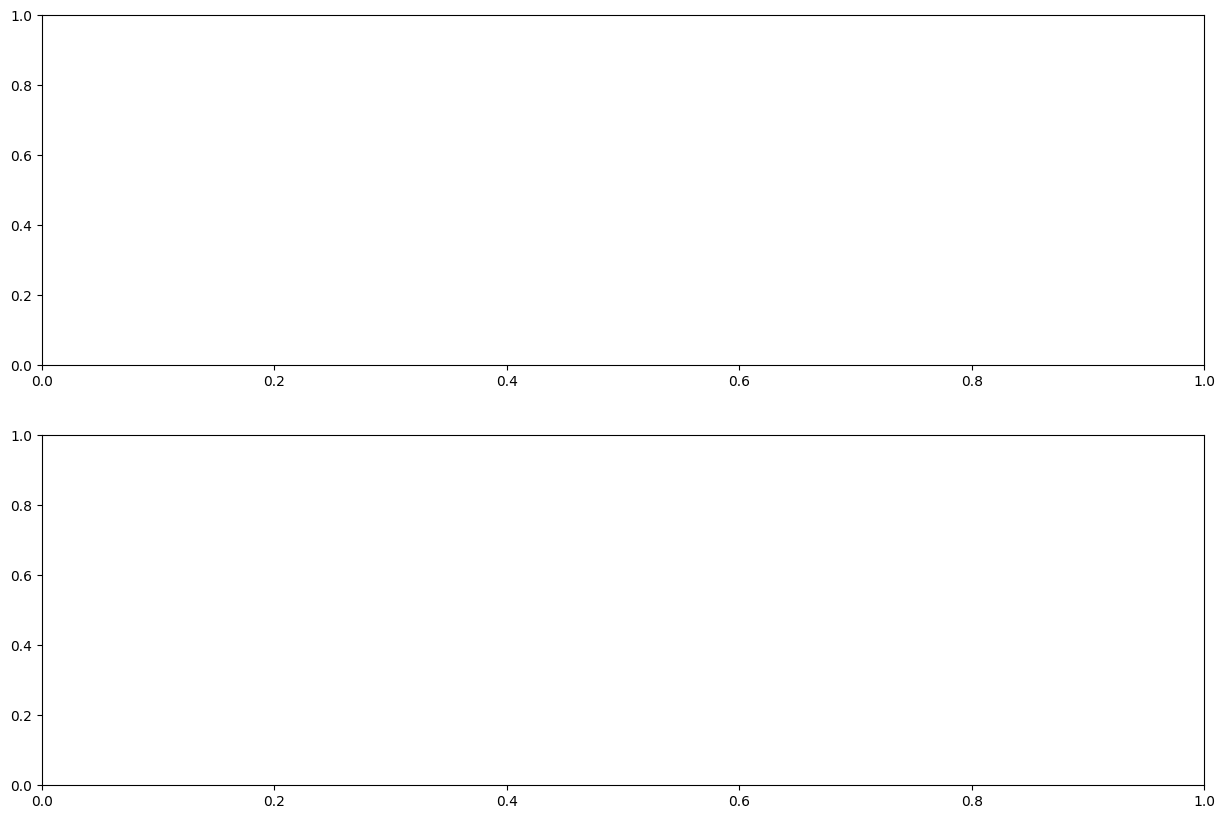

In [13]:
# AR - model
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
acf_data = acf(df, nlags=100)
